# Questão 1
Considere o problema de classificação de padrões constituído de duas classes com os seguintes conjuntos de treinamento: $C_{1} = {(0,0,0),(1,0,0),(1,0,1),(1,1,0)}$ e $C_{2}={(0,0,1),(0,1,1),(0,1,0),(1,1,1)}$. Determine o hiperplano de separação dos padrões considerando os seguintes métodos.
* Algoritmo do perceptron
* Máquina de Vetor de Suporte Linear

## Por Perceptron
Um jeito fácil de descobrir o hiperplano de separação é usando uma rede de um único perceptron. Como a entrada é um trio de valores, só há 3 pesos e um viés em toda a rede. A saída y, um valor de 0 a 1, é calculado por: $y = \sigma(w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+bias)$, sendo $\sigma(x)$ a função de ativação. Os valores de $w_{1}$, $w_{2}$, $w_{3}$ são os pesos, e o $bias$ é o viés. Todos serão calculados pelo algoritmo `Backpropagation`, implementado pela biblioteca **Keras**, e serão usados para preencher a equação do plano no $R^{3}$: $xw_{1}+yw_{2}+zw_{3}+bias=0$.

### Bibliotecas

In [1]:
import numpy as np
import keras.layers as kl
import keras.models as km
from keras.utils import plot_model
import pydot
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Dados de treino
Os dados de treino `x_treino` consistem em todos o números representáveis com 3 algarismos na base binária, isto é, de (0,0,0) a (1,1,1). No gráfico, esses pontos formam um cubo no 1º octante.

O gabarito `y_treino` foi escrito na mão seguindo a tabela abaixo:
<table>
  <tl>
      <td>x_treino</td>
      <td>y_treino</td>
  </tl>
  <tr>
    <td>000</td>
    <td>0</td>
  </tr>
  <tr>
    <td>001</td>
    <td>1</td>
  </tr>
  <tr>
    <td>010</td>
    <td>1</td>
  </tr>
  <tr>
    <td>011</td>
    <td>1</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0</td>
  </tr>
  <tr>
    <td>101</td>
    <td>0</td>
  </tr>
  <tr>
    <td>110</td>
    <td>0</td>
  </tr>
  <tr>
    <td>111</td>
    <td>1</td>
  </tr>
</table>

In [2]:
x_treino = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            x_treino.append([i,j,k])
            
y_treino = [0,1,1,1,0,0,0,1]
x_treino = np.array(x_treino)
y_treino = np.array(y_treino).reshape(-1, 1)

### Construindo modelo da rede neural
A rede consiste de um perceptron de 3 entradas e função de ativação sigmoide. A função custo usada é a **Root Mean Squared Logathmic Error**, uma variação do **RMSE** (média quadrática, em português). $$RMSLE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\log (p_{i}+1)-\log (y_{i}+1))^{2}}$$
$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i}-p_{i})^{2}} $$

Legenda:
* $y_{i}$ = valor correto
* $p_{i}$ = valor estimado pela rede
* N = tamanho do lote

**OBS.:** Treinamos a rede com 10000 épocas para fins de teste, com metade dessa quantidade geralmente temos um erro próximo de 1% apenas.

In [18]:
model = km.Sequential()  # Entrada
model.add(kl.Dense(1, activation='sigmoid', input_dim=3)) # Primeira camada oculta
model.compile(loss='msle', optimizer='adam')

H = model.fit(x_treino, y_treino, epochs=10000, verbose=0)

### Histórico da função custo
O gráfico abaixo mostra a decrescimento do erro conforme o a rede treina seus pesos. Cada ponto corresponde a (época, erro).

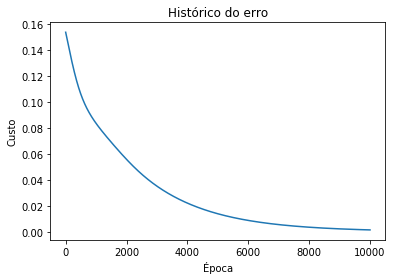

In [19]:
plt.plot(H.history['loss'])
plt.xlabel('Época')
plt.ylabel('Custo')
plt.title('Histórico do erro')
plt.show()

### Visualização do hiperplano


In [20]:
rotulos = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            rotulos.append(model.predict(np.array([[i,j,k]])))

print('Comparando estimações com o gabarito:')
for i in range(len(rotulos)):
    print('Amostra: '+str(x_treino[i])+' - Gabarito: '+str(y_treino[i][0])+' - Estimado: '+str(rotulos[i][0][0]))

param = model.get_weights()
print('\nPesos da rede neural:')
print('w1= '+str(param[0][0][0]))
print('w2= '+str(param[0][1][0]))
print('w3= '+str(param[0][2][0]))

print('viés= '+str(param[1][0]))

Comparando estimações com o gabarito:
Amostra: [0 0 0] - Gabarito: 0 - Estimado: 0.056692705
Amostra: [0 0 1] - Gabarito: 1 - Estimado: 0.9337543
Amostra: [0 1 0] - Gabarito: 1 - Estimado: 0.9190131
Amostra: [0 1 1] - Gabarito: 1 - Estimado: 0.9996244
Amostra: [1 0 0] - Gabarito: 0 - Estimado: 0.00019261004
Amostra: [1 0 1] - Gabarito: 0 - Estimado: 0.04322864
Amostra: [1 1 0] - Gabarito: 0 - Estimado: 0.03509771
Amostra: [1 1 1] - Gabarito: 1 - Estimado: 0.8950784

Pesos da rede neural:
w1= -5.7429037
w2= 5.2407594
w3= 5.457589
viés= -2.8117466


O plano retornado foi plotado no geogebra e as imagens podem ser vistas abaixo. 
![Plano de separação](img/v2.png)
![Plano de separação](img/v1.png)
Temos algumas observações a fazer:
* O plano encontrado não é a solução ótima.
* Cada treino gera valores diferentes de $w_{1}$, $w_{2}$, $w_{3}$ e $bias$, mas todos geram planos parecidos.
* Apesar de só haver um neurônio foi preciso uma quantidade bem grande de épocas (em torno de 5000) para gerar parâmetros satisfatórios.

## Utilizando SMV

O objetivo de utilizar SVM para resolver esse problema é encontrar um hiperplano que separe as duas classes, ou seja, todos os pontos acima do hiperplano devem pertencer a uma mesma classe, o mesmo para a região abaixo do hiperplano. Para realizar essa tarefa pode-se utilizar diferentes tipos de kernel, mas usando o kernel linear obtem-se os coeficientes que descrevem o hiperplano.

### Bibliotecas

In [6]:
from sklearn import svm
import numpy as np

## Dados de treino

In [7]:
training_data = np.array([[0,0,0], [1,0,0], [1,0,1], [1,1,0], [0,0,1], [0,1,1], [0,1,0], [1,1,1]])
class_training_data = np.array(['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2'])

## Implementação da SVM usando kernel linear

In [8]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(training_data, class_training_data)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

O parâmetro C no código acima indica a penalidade por um erro e utilizando diferentes valores obtem-se resultados diferentes. Os coeficientes do hiperplano são obtidos da seguinte forma:

In [9]:
print('Coeficientes do hiperplano: ', clf.coef_)
print('Termo independente', clf.intercept_)

Coeficientes do hiperplano:  [[-1.  1.  1.]]
Termo independente [-0.5]


In [10]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(training_data, class_training_data)
print('Coeficientes do hiperplano: ', clf.coef_)
print('Termo independente', clf.intercept_)

Coeficientes do hiperplano:  [[-1.99969517  1.99969517  1.99939034]]
Termo independente [-0.99969517]


In [11]:
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(training_data, class_training_data)
print('Coeficientes do hiperplano: ', clf.coef_)
print('Termo independente', clf.intercept_)

Coeficientes do hiperplano:  [[-0.2  0.2  0.2]]
Termo independente [-0.1]


Todos os resultados acima geram o mesmo hiperplano de equação $Z = X - Y + 0.5$, o qual é mostrado na figura abaixo, onde os pontos em azul pertencem a classe C1 e os pontos em vermelho a classe C2.

![Hiperplano](https://i.imgur.com/mpcI0un.png)
![C1](https://imgur.com/YcBz266.png)
![C2](https://i.imgur.com/mYRbpbF.png)